<a href="https://colab.research.google.com/github/zee404-code/DartsTimeSeries/blob/main/darts03(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.8/827.8 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 

In [ ]:
#from darts.datasets import HeartRateDataset
from darts.datasets import AirPassengersDataset

In [ ]:
from darts.models import StatsForecastAutoARIMA

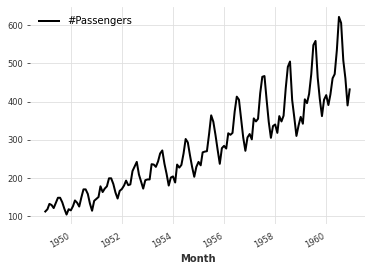

In [ ]:
#series = HeartRateDataset().load()
series = AirPassengersDataset().load()
series.plot()

In [ ]:
train, test = series.split_before(0.66)
print(len(series))
print(len(train))
print(len(test))

144
94
50


In [ ]:
print(series.mean(axis=0))

<TimeSeries (DataArray) (time: 1, component: 1, sample: 1)>
array([[[92.59611439]]])
Coordinates:
  * time       (time) int64 0
  * component  (component) object 'Heart rate'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [ ]:
#print(series.var(ddof=1))

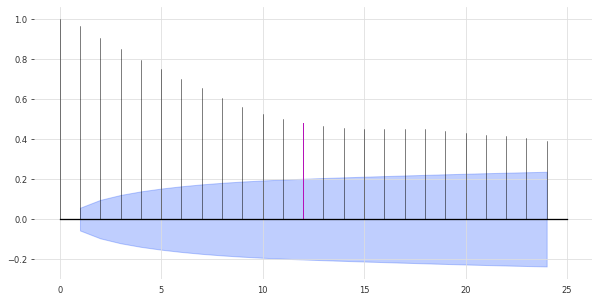

In [ ]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 12.


In [ ]:
data = train
for m in range(1, 18):
  data = data.diff()

for m in range(2, 25):
    is_seasonal, period = check_seasonality(train.diff().diff(), m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 3.
There is seasonality of order 6.
There is seasonality of order 9.
There is seasonality of order 12.
There is seasonality of order 15.
There is seasonality of order 17.
There is seasonality of order 19.
There is seasonality of order 21.


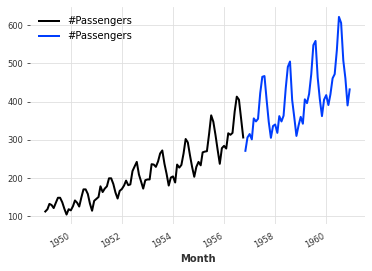

In [ ]:
train.plot()
test.plot()

In [ ]:
from darts.models import ARIMA, AutoARIMA #, VARIMA

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'ARIMA(12, 1, 0)    10.66%'

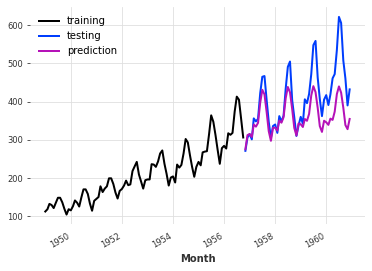

In [ ]:
from darts.metrics import mape, coefficient_of_variation, dtw_metric, mae, marre, mase, mse, ope, r2_score, rho_risk, rmse, rmsle, smape
def eval_models_mape(model):
  model.fit(train)
  pred = model.predict(len(test))
  #print("model {} obtains MAPE: {:.2f}%".format(model, mape(test, pred)))
  train.plot(label = 'training')
  test.plot(label = 'testing')
  pred.plot(label = 'prediction')
  return "{}    {:.2f}%".format(model, mape(test, pred))
eval_models_mape(ARIMA())

'Auto-ARIMA    19.68%'

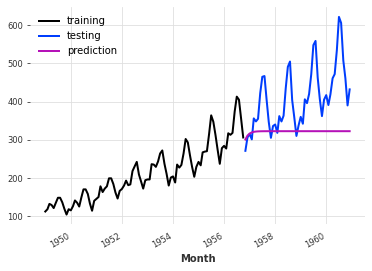

In [ ]:
eval_models_mape(AutoARIMA())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'ARIMA(12, 1, 0)    49.31%'

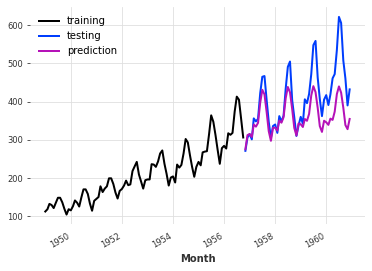

In [ ]:
def eval_models_mae(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}    {:.2f}%".format(model, mae(test, pred)))

eval_models_mae(ARIMA())

'Auto-ARIMA    90.46%'

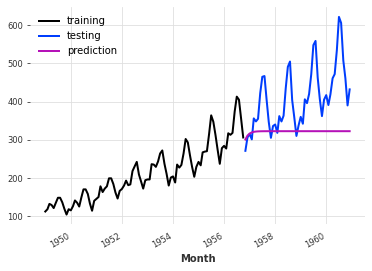

In [ ]:
eval_models_mae(AutoARIMA())

In [ ]:
def eval_models_cov(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, coefficient_of_variation(test, pred)))

eval_models_cov(ARIMA())

'ARIMA(12, 1, 0)   9.05%'

In [ ]:
def eval_models_dtw(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, dtw_metric(test, pred)))

eval_models_dtw(ARIMA())

'ARIMA(12, 1, 0)   3.64%'

In [ ]:
def eval_models_marre(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, marre(test, pred)))

eval_models_marre(ARIMA())

'ARIMA(12, 1, 0)   22.35%'

In [ ]:
#def eval_models_mase(model):
  #model.fit(train)
  #pred = model.predict(len(test))
  #insample = 
  #return("model {} obtains MASE: {:.2f}%".format(model, mase(test, pred, insample)))

#eval_models_mase(ARIMA())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


'ARIMA(12, 1, 0)    4562.72%'

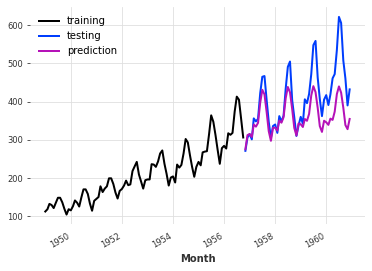

In [ ]:
def eval_models_mse(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}    {:.2f}%".format(model, mse(test, pred)))

eval_models_mse(ARIMA())

##### was giving an output of 4559.79%
## doesnt work for a single series

'Auto-ARIMA    13760.52%'

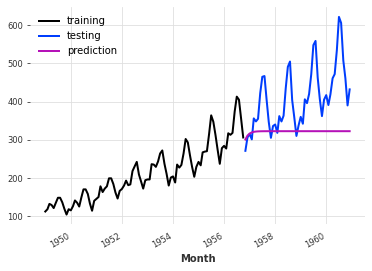

In [ ]:
eval_models_mse(AutoARIMA())

In [ ]:
def eval_models_ope(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, ope(test, pred)))

eval_models_ope(ARIMA())

'ARIMA(12, 1, 0)   6.50%'

In [ ]:
def eval_models_r2_score(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, r2_score(test, pred)))

eval_models_r2_score(ARIMA())

'ARIMA(12, 1, 0)   -1.07%'

In [ ]:
def eval_models_rho_risk(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}    {:.2f}%".format(model, rho_risk(test, pred)))
  
#eval_models_rho_risk(ARIMA())

#### only works for stochastic predicted TimeSeries

In [ ]:
def eval_models_rmse(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, rmse(test, pred)))

eval_models_rmse(ARIMA())

'ARIMA(12, 1, 0)   8.35%'

In [ ]:
def eval_models_rmsle(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, rmsle(test, pred)))

eval_models_rmsle(ARIMA())

'ARIMA(12, 1, 0)   0.09%'

In [ ]:
def eval_models_smape(model):
  model.fit(train)
  pred = model.predict(len(test))
  return("{}   {:.2f}%".format(model, smape(test, pred)))

eval_models_smape(ARIMA())

'ARIMA(12, 1, 0)   7.45%'

In [ ]:
#model = VARIMA()
#model.fit(train)

#this works, but not working with this at the moment

In [ ]:
#eval_models(VARIMA())         can't directly do varima, however the codes below would run for 
#multivariate datasets and the one I have is univariate. 

#from darts.dataprocessing.transformers import Scaler

#multi_series = HeartRateDataset().load()
#training_set, validation_set = multi_series.split_before(0.66)

#scaler_dataset = Scaler()

#def fit_and_pred(model, training, validation):
   # model.fit(training)
  #  forecast = model.predict(len(validation))
 #   return forecast

#training_scaled = scaler_dataset.fit_transform(training_set)
#validation_scaled = scaler_dataset.transform(validation_set)

#model_VARIMA = VARIMA(p=12, d=0, q=0, trend = "n")

# training and prediction with the VARIMA model

#forecast_VARIMA = fit_and_pred(model_VARIMA, training_scaled, validation_scaled)

#print("MAPE (VARIMA) = {:.2f}".format(mape(validation_scaled, forecast_VARIMA)))
#forecast_VARIMA = scaler_dataset.inverse_transform(forecast_VARIMA)

In [ ]:
eval_models_mape(AutoARIMA())

'Auto-ARIMA    5.82%'

In [ ]:
import pandas as pd
metrics = {}
metrics['MAPE'] = eval_models_mape(ARIMA()) 
metrics['COFFECIENT OF VARIATION'] = eval_models_cov(ARIMA())
metrics['DTW METRIC'] = eval_models_dtw(ARIMA())
metrics['MAE'] = eval_models_mae(ARIMA())
metrics['MARRE'] = eval_models_marre(ARIMA())
metrics['MASE'] = "doesnt work" #eval_models_mase(ARIMA())
metrics['MSE'] = "doesnt work"##eval_models_mse(ARIMA())
metrics['OPE'] = eval_models_ope(ARIMA())
metrics['R2 SCORE'] = eval_models_r2_score(ARIMA())
metrics['RHO RISK'] = "doesnt work" #eval_models_rho_risk(ARIMA())
metrics['RMSE'] = eval_models_rmse(ARIMA())
metrics['RMSLE'] = eval_models_rmsle(ARIMA())
metrics['SMAPE'] = eval_models_smape(ARIMA())

df = pd.DataFrame.from_dict(metrics, orient='index')

In [ ]:
col1 = ['METRICS', 'MAPE', 'COFFECIENT OF VARIATION','DTW METRIC', 'MAE', 'MARRE', 'MASE',
        'MSE', 'OPE', 'R2 SCORE', 'RHO RISK', 'RMSE', 'RMSLE', 'SMAPE']

In [ ]:
col2 = ['ARIMA', eval_models_mape(ARIMA()), eval_models_cov(ARIMA()), eval_models_dtw(ARIMA()),
eval_models_mae(ARIMA()), eval_models_marre(ARIMA()) , "doesnt work", eval_models_mse(ARIMA()), 
eval_models_ope(ARIMA()), eval_models_r2_score(ARIMA()), "doesnt work", 
eval_models_rmse(ARIMA()), eval_models_rmsle(ARIMA()), eval_models_smape(ARIMA())]


In [ ]:
col3 = ['AutoARIMA', eval_models_mape(AutoARIMA()), eval_models_cov(AutoARIMA()), eval_models_dtw(AutoARIMA()),
eval_models_mae(AutoARIMA()), eval_models_marre(AutoARIMA()) , 'doesnt work', 
eval_models_mse(AutoARIMA()) , eval_models_ope(AutoARIMA()), eval_models_r2_score(AutoARIMA()),
 'doesnt work', eval_models_rmse(AutoARIMA()), eval_models_rmsle(AutoARIMA()),
  eval_models_smape(AutoARIMA())]


In [ ]:
col4 = ['StatsForecastAutoARIMA', eval_models_mape(StatsForecastAutoARIMA()), eval_models_cov(StatsForecastAutoARIMA()), eval_models_dtw(StatsForecastAutoARIMA()),
eval_models_mae(StatsForecastAutoARIMA()), eval_models_marre(StatsForecastAutoARIMA()) , 'doesnt work', 
eval_models_mse(StatsForecastAutoARIMA()) , eval_models_ope(StatsForecastAutoARIMA()), eval_models_r2_score(StatsForecastAutoARIMA()),
 'doesnt work', eval_models_rmse(StatsForecastAutoARIMA()), eval_models_rmsle(StatsForecastAutoARIMA()),
  eval_models_smape(StatsForecastAutoARIMA())]


In [ ]:
df = pd.DataFrame()
df = pd.DataFrame(col2, col1)
df.insert(0, 1, col3)
df.insert(1, 2, col4)
print(df)

                                            1  \
METRICS                             AutoARIMA   
MAPE                      Auto-ARIMA    5.82%   
COFFECIENT OF VARIATION    Auto-ARIMA   6.94%   
DTW METRIC                 Auto-ARIMA   5.02%   
MAE                       Auto-ARIMA    5.20%   
MARRE                     Auto-ARIMA   16.68%   
MASE                              doesnt work   
MSE                      Auto-ARIMA    40.92%   
OPE                        Auto-ARIMA   2.93%   
R2 SCORE                  Auto-ARIMA   -0.21%   
RHO RISK                          doesnt work   
RMSE                       Auto-ARIMA   6.40%   
RMSLE                      Auto-ARIMA   0.07%   
SMAPE                      Auto-ARIMA   5.63%   

                                                           2  \
METRICS                               StatsForecastAutoARIMA   
MAPE                      Auto-ARIMA-Statsforecasts    7.17%   
COFFECIENT OF VARIATION    Auto-ARIMA-Statsforecasts   8.31%   
DTW METR

In [ ]:
################ VISULAIZATIONS ########################
def visuals(model):
  model.fit(train)
  pred = model.predict(len(test))
  train.plot(label = 'training')
  test.plot(label = 'testing')
  pred.plot(label = 'prediction')
  

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


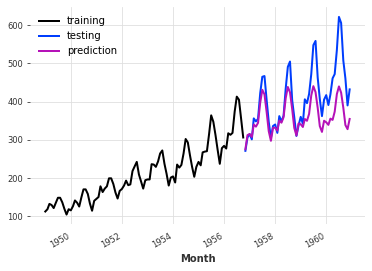

In [ ]:
visuals(ARIMA())

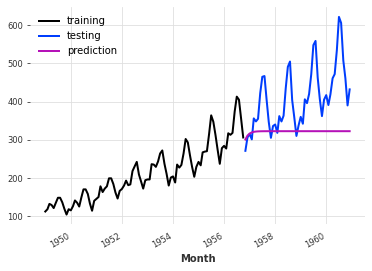

In [ ]:
visuals(AutoARIMA())

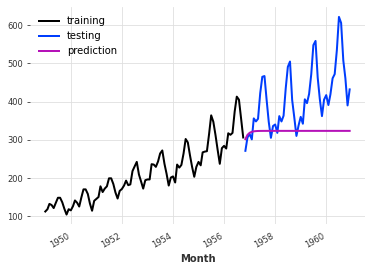

In [ ]:
visuals(StatsForecastAutoARIMA())

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pmdarima
from pmdarima.arima import auto_arima
from pmdarima.datasets import load_heartrate

data = pmdarima.datasets.load_heartrate()
print(data)

#from pmdarima.arima import ADFTest, methods
#d = pmdarima.

fit = pmdarima.auto_arima(data, m=12)

[84.2697 84.2697 84.0619 85.6542 87.2093 87.1246 86.8726 86.7052 87.5899
 89.1475 89.8204 89.8204 90.4375 91.7605 93.1081 94.3291 95.8003 97.5119
 98.7457 98.904  98.3437 98.3075 98.8313 99.0789 98.8157 98.2998 97.7311
 97.6471 97.7922 97.2974 96.2042 95.2318 94.9367 95.0867 95.389  95.5414
 95.2439 94.9415 95.3557 96.3423 97.1563 97.4026 96.7028 96.5516 97.9837
 98.9879 97.6312 95.4064 93.8603 93.0552 94.6012 95.8476 95.7692 95.9236
 95.7692 95.9211 95.8501 94.6703 93.0993 91.972  91.7821 91.7911 90.807
 89.3196 88.1511 88.7762 90.2265 90.8066 91.2284 92.4238 93.243  92.8472
 92.5926 91.7778 91.2974 91.6364 91.2952 91.771  93.2285 93.3199 91.8799
 91.2239 92.4055 93.8716 94.5825 94.5594 94.9453 96.2412 96.6879 95.8295
 94.7819 93.4731 92.7997 92.963  92.6996 91.9648 91.2417 91.9312 93.9548
 95.3044 95.2511 94.5358 93.8093 93.2287 92.2065 92.1588 93.6376 94.899
 95.1592 95.2415 95.5414 95.0971 94.528  95.5887 96.4715 96.6158 97.0769
 96.8531 96.3947 97.4291 98.1767 97.0148 96.044  95.9

In [ ]:
fit.params()

array([0.94320662, 0.48877487])

In [ ]:
fit.get_params() #order (0, 2, 1)

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 2, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [ ]:
#can also access the AR and MA params
fit

ARIMA(order=(0, 2, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
fit.arparams()

array([], dtype=float64)

In [ ]:
fit.maparams()

array([0.94320662])

In [ ]:
fit.arima_res_.seasonalarparams

array([], dtype=float64)

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -158.133
Date:                Tue, 14 Mar 2023   AIC                            320.266
Time:                        13:50:57   BIC                            326.260
Sample:                             0   HQIC                           322.701
                                - 150                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9432      0.035     26.717      0.000       0.874       1.012
sigma2         0.4888      0.051      9.582      0.000       0.389       0.589
===================================================================================
Ljung-Box (L1) (Q):                   8.89   Jarque-Bera (JB):                 4.07
Prob(Q):                              0.00   Prob(JB):                         0.13
Heteroskedasticity (H):               1.57   Skew:                             0.33
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""